In [1]:
import serial
import time
import pandas as pd
from pprint import pprint as pp

com2 = serial.Serial()

# declarando as portas seriais
com2.port = "COM9"

com2.baudrate = 9600

com2.timeout = 1

# Configuração da taxa de amostragem
taxa_amostragem = 1000  # 1 kHz

df = pd.DataFrame()

com2.open()

# Tempo de espera para a estabilização do Arduino
time.sleep(5)

In [92]:
# inicializando um contador
contador = 0

In [3]:
while True:
    # formantando a string de leitura 443 | 123\r\n
    byte_data = com2.readline()
    string = byte_data.decode()
    # tirando os caracteres de quebra de linha
    string = string.strip('\r\n')
    lista = string.split(' | ')
    # pp(lista)

    tempo = time.time() * 1000 

    # Convertendo os dados para float
    tensao_a0 = float(lista[0])
    tensao_a1 = float(lista[1])
    corrente_a2 = float(lista[2])
    corrente_a0 = tensao_a0
    corrente_a1 = tensao_a1

    # Convertendo os dados da escala 0-1023 para 0-5V
    tensao_a0 = tensao_a0 * (5 / 1023)
    tensao_a1 = tensao_a1 * (5 / 1023)
    corrente_a2 = corrente_a2 * (5 / 1023)

    # Calculando a corrente


    # Adicionando os dados ao dicionário
    df = df._append({"Tempo": tempo, f"Tensão no Resistor 180 ohms": tensao_a0,  f"Corrente no Resistor 180 ohms": corrente_a0, f"Tensão na Carga": tensao_a1,  f"Corrente na Carga": corrente_a1, f"Corrente Coleta": corrente_a2}, ignore_index=True)

    # se for um tempo especifico entao para o loop
    if tempo == 300000:
        break
    
    # Incrementando o contador
    # contador += 1
    # if contador == 10:
    #     break
    # Para o loop por 1 / taxa_amostragem segundos
    time.sleep(1 / taxa_amostragem)

KeyboardInterrupt: 

In [4]:
# Encerra o loop quando o usuário pressiona Ctrl+C
com2.close()
df.to_csv("amostras.csv")
display(df)

,Tempo,Tensão no Resistor 180 ohms,Corrente no Resistor 180 ohms,Tensão na Carga,Corrente na Carga,Corrente Coleta
0,1.702904e+12,2.497556,511.0,2.429130,497.0,2.453568
1,1.702904e+12,2.502444,512.0,2.434018,498.0,2.453568
2,1.702904e+12,2.517107,515.0,2.443793,500.0,2.453568
3,1.702904e+12,2.526882,517.0,2.443793,500.0,2.458456
4,1.702904e+12,2.497556,511.0,2.434018,498.0,2.453568
...,...,...,...,...,...,...
21696,1.702904e+12,2.507331,513.0,2.434018,498.0,2.468231
21697,1.702904e+12,2.492669,510.0,2.443793,500.0,2.478006
21698,1.702904e+12,2.507331,513.0,2.448680,501.0,2.453568
21699,1.702904e+12,2.521994,516.0,2.448680,501.0,2.463343


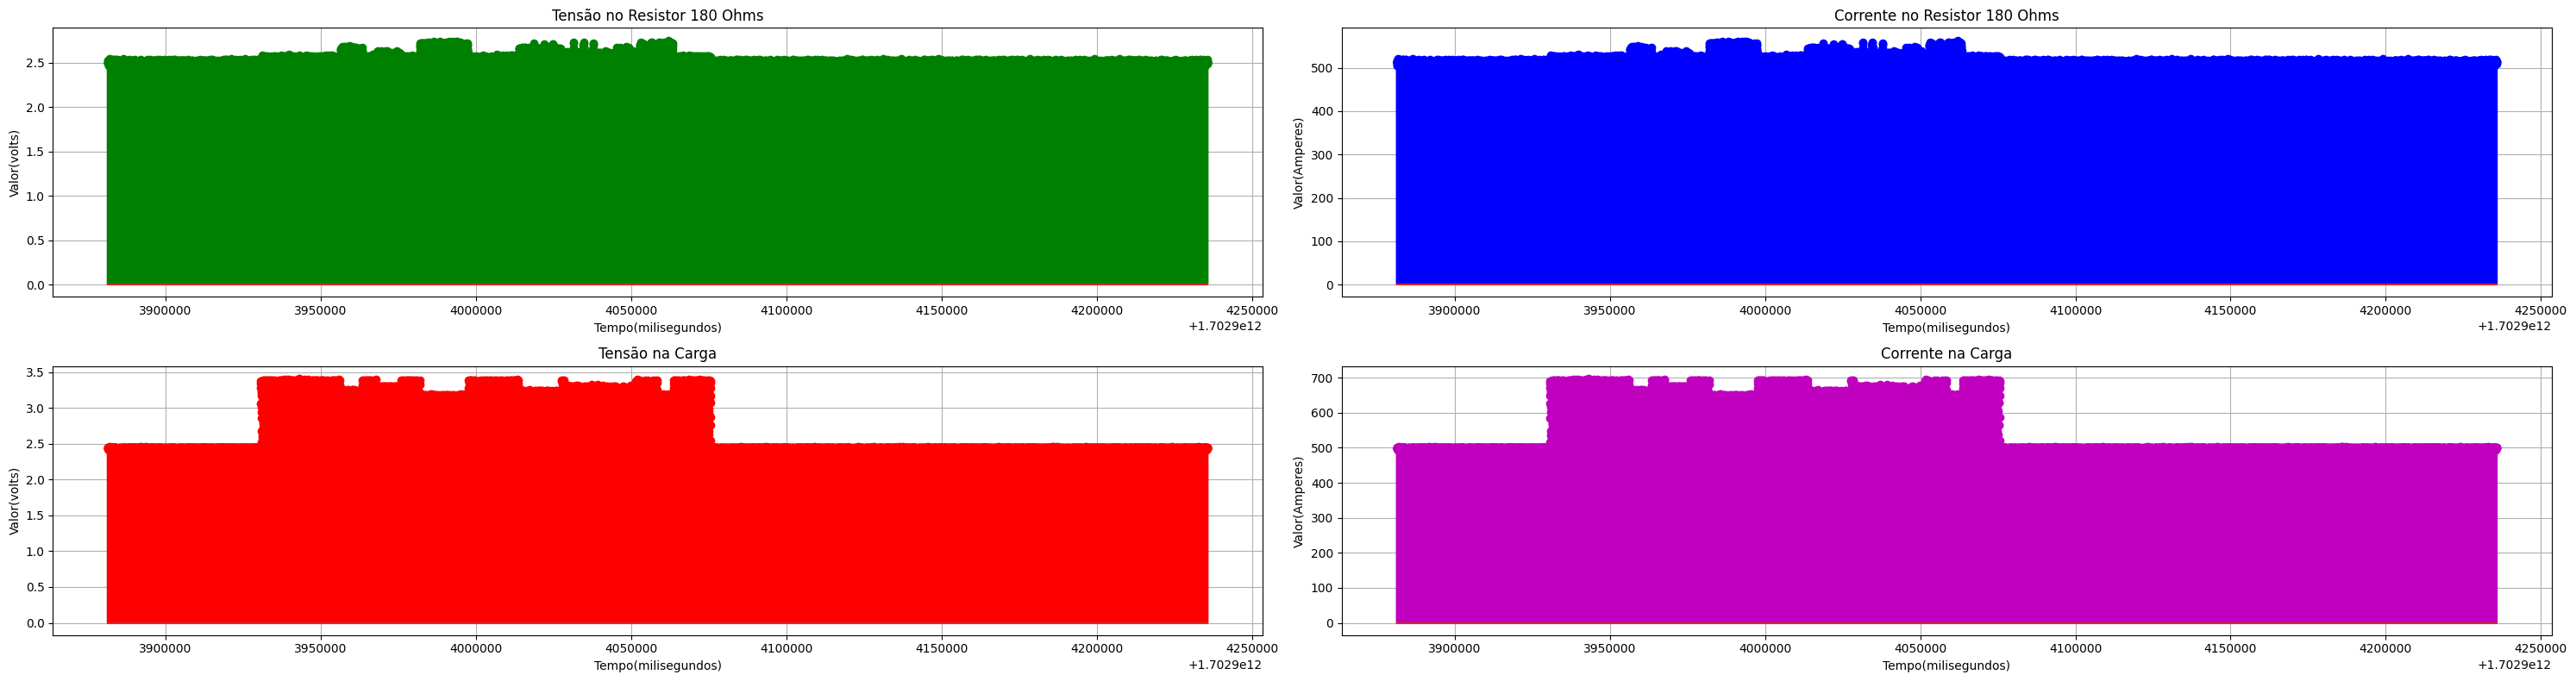

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 8))

# Plotando a tensão no Resistor 180 Ohms
plt.subplot(2, 2, 1)  # subplot com 2 linhas e 2 colunas, este é o primeiro gráfico
plt.stem(df['Tempo'], df['Tensão no Resistor 180 ohms'], 'g')
plt.title('Tensão no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente no Resistor 180 Ohms
plt.subplot(2, 2, 2)  # subplot com 2 linhas e 2 colunas, este é o segundo gráfico
plt.stem(df['Tempo'], df['Corrente no Resistor 180 ohms'], 'b')
plt.title('Corrente no Resistor 180 Ohms')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

# Plotando a tensão na Carga
plt.subplot(2, 2, 3)  # subplot com 2 linhas e 2 colunas, este é o terceiro gráfico
plt.stem(df['Tempo'], df['Tensão na Carga'], 'r')
plt.title('Tensão na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(volts)')
plt.grid(True)

# Plotando a corrente na Carga
plt.subplot(2, 2, 4)  # subplot com 2 linhas e 2 colunas, este é o quarto gráfico
plt.stem(df['Tempo'], df['Corrente na Carga'], 'm')
plt.title('Corrente na Carga')
plt.xlabel('Tempo(milisegundos)')
plt.ylabel('Valor(Amperes)')
plt.grid(True)

plt.tight_layout()  # garante um bom espaçamento entre os gráficos
plt.show()